In [2]:
# default_exp orbital

# Visualizing the SpaceX Tesla Roadster trip to Mars
Example taken from [poliastro docs](
https://hub.gke2.mybinder.org/user/poliastro-poliastro-4oek8xlv/notebooks/docs/source/examples/Visualizing%20the%20SpaceX%20Tesla%20Roadster%20trip%20to%20Mars.mystnb).

In [1]:
#!pip install rocketpy netCDF4

In [37]:
import pandas as pd
import altair as alt
from rocketpy import Environment, SolidMotor, Rocket, Flight

In [3]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [47]:
# Creating an Environment for Starbase, Boca Chica
Env = Environment(
    railLength=5.2,
    latitude=25.996845, 
    longitude=-97.155086,
    elevation=0
) 

In [48]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12)) # Hour given in UTC time

In [49]:
Env.setAtmosphericModel(type='Forecast', file='GFS')

oc_open: server error retrieving url: code=0 message="/gfs_0p25/gfs20211227/gfs_0p25_18z is not an available dataset"

Launch Site Details

Launch Rail Length:  5.2  m
Launch Date:  2021-12-28 12:00:00  UTC
Launch Site Latitude: 25.99685°
Launch Site Longitude: -97.15509°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 83931.49 W    2881954.92 N
Launch Site UTM zone: 15R
Launch Site Surface Elevation: 2.1 m


Atmospheric Model Details

Atmospheric Model Type:  Forecast
Forecast Maximum Height: 79.023 km
Forecast Time Period: From  2021-12-27 12:00:00  to  2022-01-12 12:00:00  UTC
Forecast Hour Interval:  3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 11.73 m/s
Surface Wind Direction: 167.90°
Surface Wind Heading: 347.90°
Surface Pressure: 1000.00 hPa
Surface Temperature: 296.30 K
Surface Air Density: 1.176 kg/m³
Surface Speed of Sound: 345.07 m/s


Atmospheric Model Plots


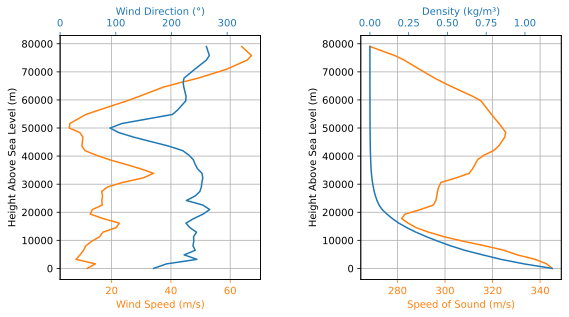

In [50]:
Env.info()

In [51]:
!wget https://raw.githubusercontent.com/Projeto-Jupiter/RocketPy/master/data/calisto/powerOffDragCurve.csv .
!wget https://raw.githubusercontent.com/Projeto-Jupiter/RocketPy/master/data/calisto/powerOnDragCurve.csv .

--2021-12-27 22:41:25--  https://raw.githubusercontent.com/Projeto-Jupiter/RocketPy/master/data/calisto/powerOffDragCurve.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3362 (3.3K) [text/plain]
Saving to: ‘powerOffDragCurve.csv.1’

powerOffDragCurve.c 100%[===================>]   3.28K  --.-KB/s    in 0s      

2021-12-27 22:41:25 (14.7 MB/s) - ‘powerOffDragCurve.csv.1’ saved [3362/3362]

--2021-12-27 22:41:25--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2021-12-27 22:41:25--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.3K in 0s (14.7 MB/s)
--2021-12-27 22:41:26--  https://raw.githubusercontent.com/Projeto-Jupiter/RocketPy/master/data/calisto/powerOnDragCurve.csv
R

In [52]:
# Create Motor
Pro75M1670 = SolidMotor(
    thrustSource="Cesaroni_M1670.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5/1000,
    grainDensity=1815,
    grainOuterRadius=33/1000,
    grainInitialInnerRadius=15/1000,
    grainInitialHeight=120/1000,
    nozzleRadius=33/1000,
    throatRadius=11/1000,
    interpolationMethod='linear'
)


In [53]:
# Creating a Rocket
Calisto = Rocket(
    motor=Pro75M1670,
    radius=127/2000,
    mass=19.197-2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag='powerOffDragCurve.csv',
    powerOnDrag='powerOnDragCurve.csv'
)

Calisto.setRailButtons([0.2, -0.5])

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addFins(4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956)

Tail = Calisto.addTail(topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656)

In [56]:
def drogueTrigger(p, y):
    return True if y[5] < 0 else False

def mainTrigger(p, y):
    return True if y[5] < 0 and y[2] < 800 else False

Main = Calisto.addParachute('Main',
                            CdS=10.0,
                            trigger=mainTrigger, 
                            samplingRate=105,
                            lag=1.5,
                            noise=(0, 8.3, 0.5))

Drogue = Calisto.addParachute('Drogue',
                              CdS=1.0,
                              trigger=drogueTrigger, 
                              samplingRate=105,
                              lag=1.5,
                              noise=(0, 8.3, 0.5))

In [63]:
# or remove parachutes

Calisto.parachutes.remove(Drogue)
Calisto.parachutes.remove(Main)

In [64]:
# Simulate flight
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0)

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 2.14 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: 11.47 m/s
Lateral Surface Wind Speed: 2.46 m/s


 Rail Departure State

Rail Departure Time: 0.363 s
Rail Departure Velocity: 25.804 m/s
Rail Departure Static Margin: 2.133 c
Rail Departure Angle of Attack: 25.222°
Rail Departure Thrust-Weight Ratio: 10.144
Rail Departure Reynolds Number: 2.239e+05


BurnOut State

BurnOut time: 3.900 s
Altitude at burnOut: 651.355 m (AGL)
Rocket velocity at burnOut: 276.053 m/s
Freestream velocity at burnOut: 278.628 m/s
Mach Number at burnOut: 0.813
Kinetic energy at burnOut: 6.188e+05 J


Apogee

Ap

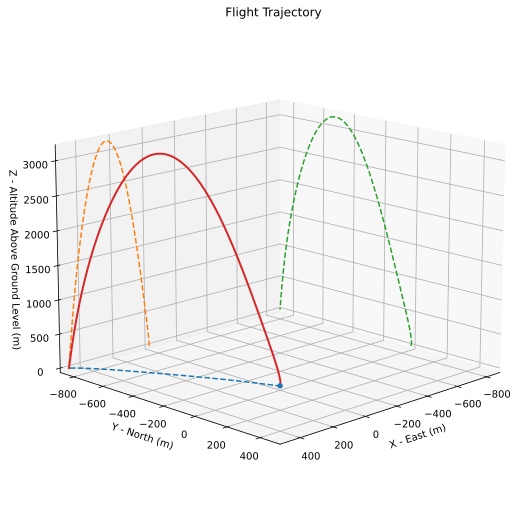



Trajectory Kinematic Plots



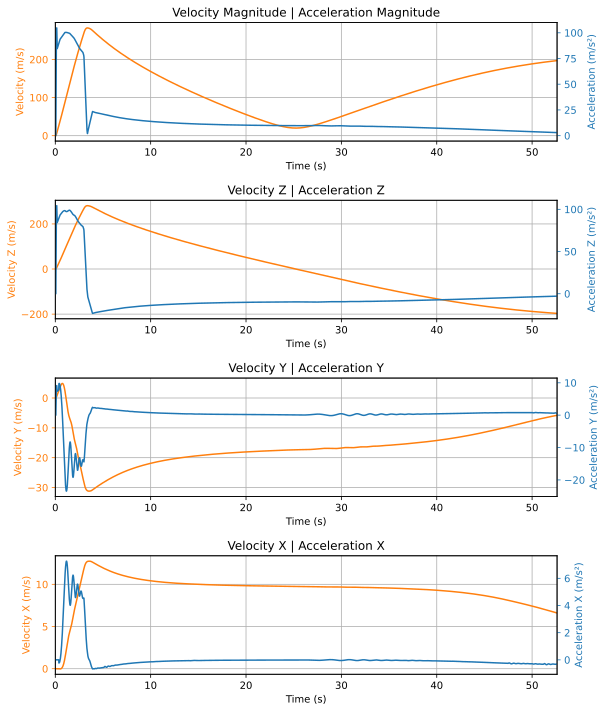



Angular Position Plots



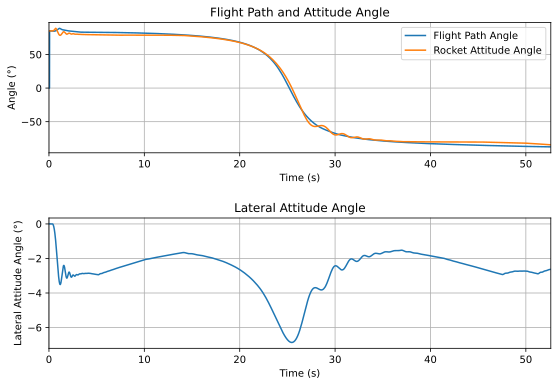



Path, Attitude and Lateral Attitude Angle plots



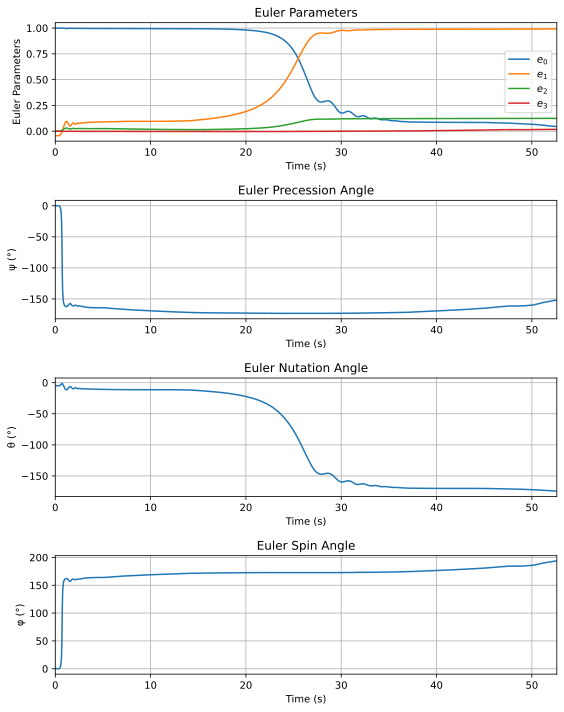



Trajectory Angular Velocity and Acceleration Plots



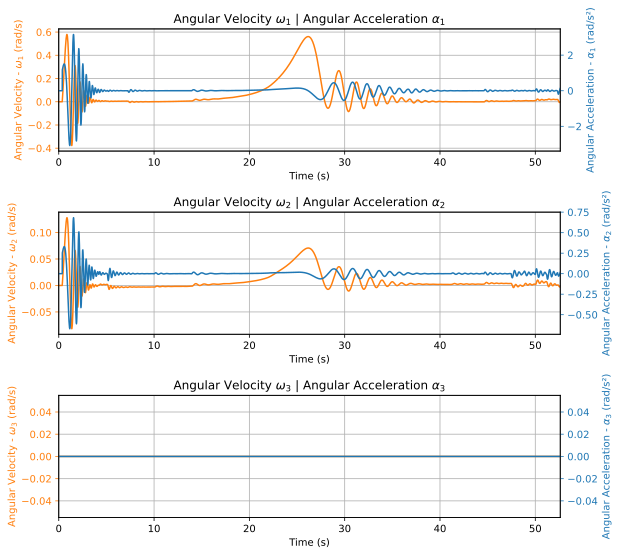



Trajectory Force Plots



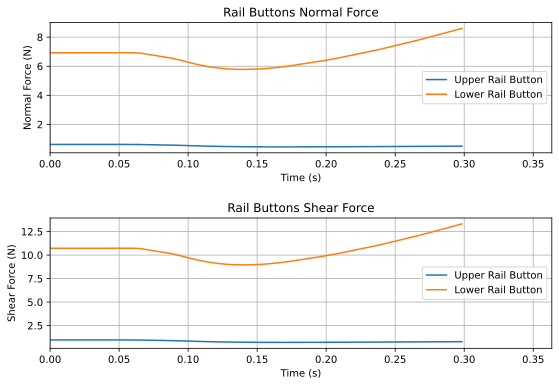

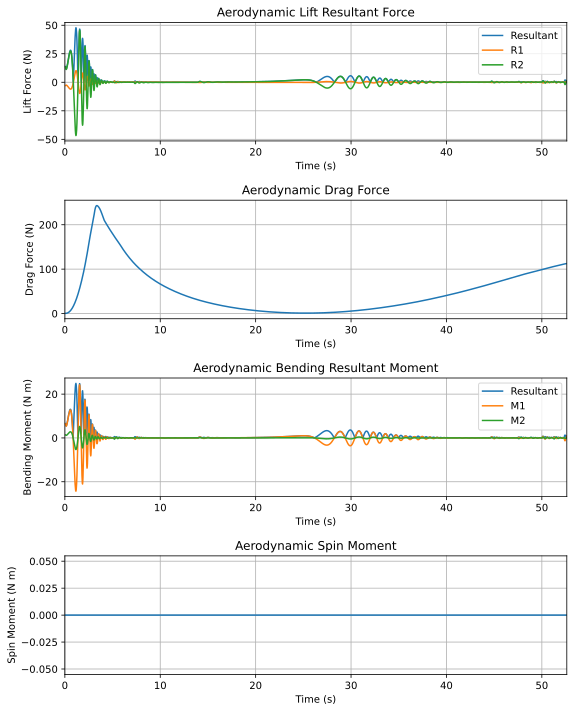



Trajectory Energy Plots



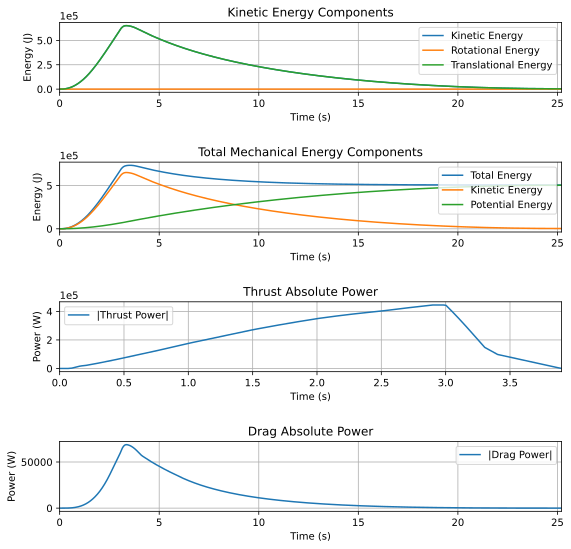



Trajectory Fluid Mechanics Plots



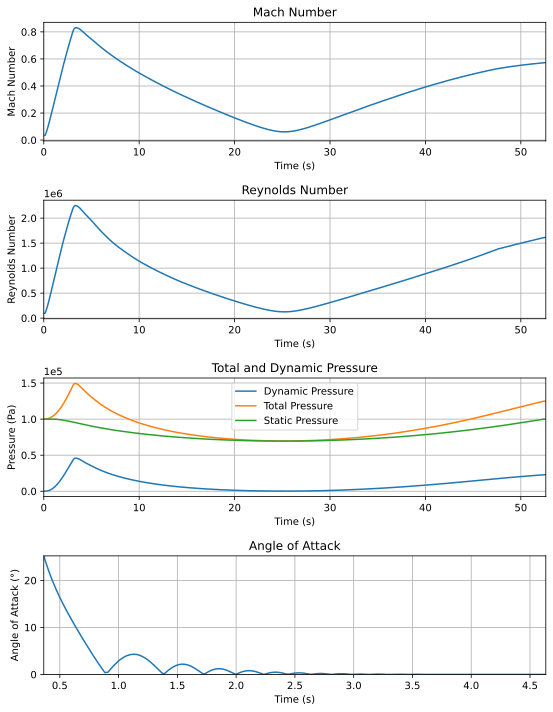



Trajectory Stability and Control Plots



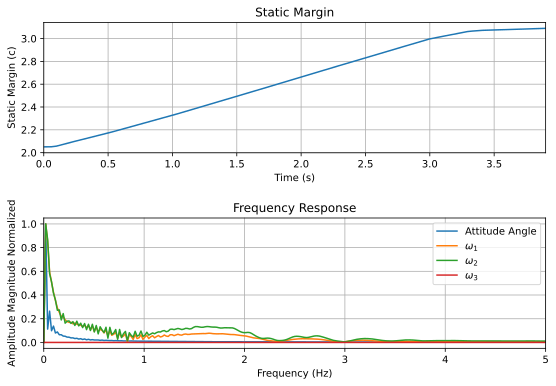

In [65]:
TestFlight.allInfo()

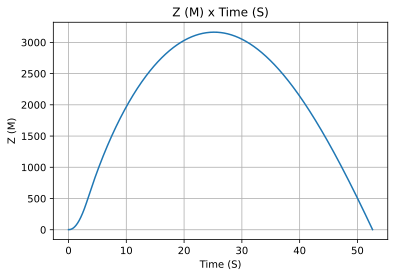

In [66]:
TestFlight.z()

In [86]:
df = pd.DataFrame(TestFlight.z[:, :], columns=['time', 'elevation'])
df['velocity'] = TestFlight.vz[:, 1]
df

,time,elevation,velocity
0,0.000000,2.143731,0.000000
1,0.001410,2.143731,0.000000
2,0.002820,2.143731,0.000000
3,0.005639,2.143731,0.000000
4,0.008459,2.143731,0.000000
...,...,...,...
1181,52.526361,20.043040,-196.583787
1182,52.552490,14.905560,-196.660222
1183,52.581548,9.189640,-196.744942
1184,52.610607,3.471262,-196.829382


In [101]:
width, height = 400, 100
z = alt.Chart(df).mark_line().encode(
    x='time',
    y='elevation'
).properties(width=width, height=height)

In [102]:
vz = alt.Chart(df).mark_line().encode(
    x='time',
    y='velocity'
).properties(width=width, height=height)

In [103]:
z & vz

alt.VConcatChart(...)